In [1]:
%matplotlib widget
import numpy as np
from zarr import ZipStore
import hyperspy.api as hs
import pyxem as pxm
from pathlib import Path

In [8]:
datapath = Path(r'/media/emilc/Data21/Data/2024-06-04T131550+0200-Alignment_SPEDSTEM-9791/data/2024_06_04_SPEDSTEM/20240604_121339/SPEDSTEM_256x256_8cm_100pct-zip.zspy')
store = ZipStore(str(datapath))
s = hs.load(store)#, lazy=True)

ERROR | RosettaSciIO | The file can't be read. It may be possible that the zspy file is saved with a different store than a zarr directory store. Try passing a different zarr store instead of the file name. (rsciio.zspy._api:280)


ERROR:rsciio.zspy._api:The file can't be read. It may be possible that the zspy file is saved with a different store than a zarr directory store. Try passing a different zarr store instead of the file name.


ERROR | Hyperspy | If this file format is supported, please report this error to the HyperSpy developers. (hyperspy.io:599)


ERROR:hyperspy.io:If this file format is supported, please report this error to the HyperSpy developers.


PathNotFoundError: nothing found at path ''

In [19]:
datapath = Path(r'/media/emilc/Data21/Data/2024-06-04T131550+0200-Alignment_SPEDSTEM-9791/data/2024_06_04_SPEDSTEM/20240604_121339/SPEDSTEM_256x256_8cm_100pct-zstore.zspy')
store = ZipStore(str(datapath))
s = hs.load(store, lazy=True)

In [20]:
s

<LazyElectronDiffraction2D, title: CPU-1, dimensions: (256, 256|256, 256)>

In [21]:
stem_image = s.metadata["Auxilliary_data"]["20240604_121339_JEOL BF _ ADF.dm3"].T
print(stem_image.axes_manager)

<Axes manager, axes: (256, 256|)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |    256 |      0 |      -0 |    0.03 |     µm 
               y |    256 |      0 |      -0 |    0.03 |     µm 
---------------- | ------ | ------ | ------- | ------- | ------ 


In [22]:
s.set_scan_calibration(stem_image.axes_manager[0].scale*1E3)

In [23]:
vbf = s.get_integrated_intensity(hs.roi.CircleROI(128, 128, 40))
vbf.compute()

[########################################] | 100% Completed | 4.07 sms


In [24]:
vbf

<Signal2D, title: Integrated intensity, dimensions: (|256, 256)>

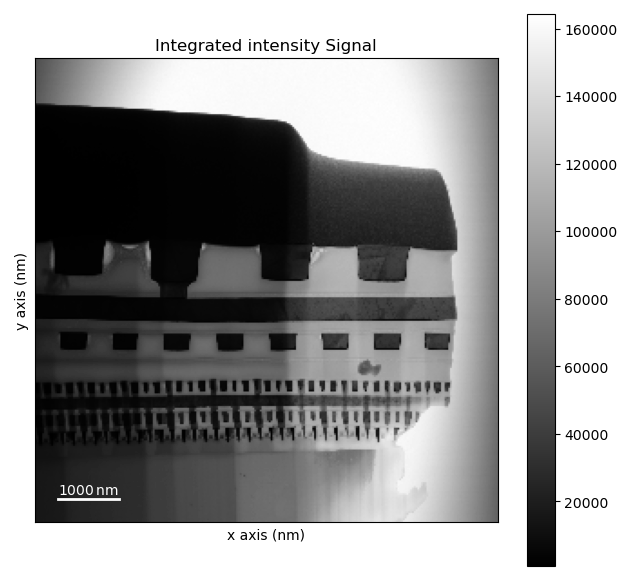

In [25]:
vbf.plot()

In [27]:
s.plot(navigator=stem_image)

In [14]:
s.plot(navigator=stem_image, norm='symlog')

ValueError: The dimensions of the provided (or stored) navigator are not compatible with this signal.

In [15]:
stem_image.plot()
stem_image

<BaseSignal, title: 20240604_121339_JEOL BF _ ADF, dimensions: (256, 256|)>

In [14]:
print(s)

<LazyElectronDiffraction2D, title: CPU-1, dimensions: (255, 256|256, 256)>
